# Skin_Cancer_Detection using CNN

## The dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. The objective to build deep learning model to classify given query image into one of the 7 different classes of skin cancer.

#### Sourses:
Data: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

Here I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data and Making labels

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [2]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

path='hmnist_28_28_RGB.csv'#'hmnist_28_28_RGB.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [5]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [6]:
print(len(train_set))

8012


In [7]:
print(len(test_set))

2003


In [8]:
df.label.unique()

array([4, 2, 1, 0, 6, 5, 3], dtype=int64)

In [9]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [10]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [13]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


# Step 4: Exploratory Data Analysis and Preprocessing

In [38]:
import seaborn as sns

#sns.countplot(train_set['label'])

In [15]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

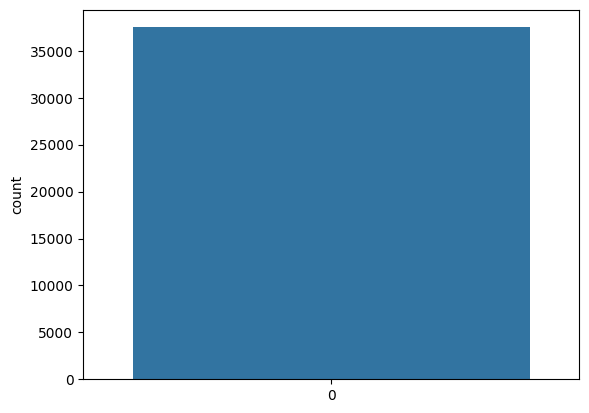

In [16]:
sns.countplot(y_train)

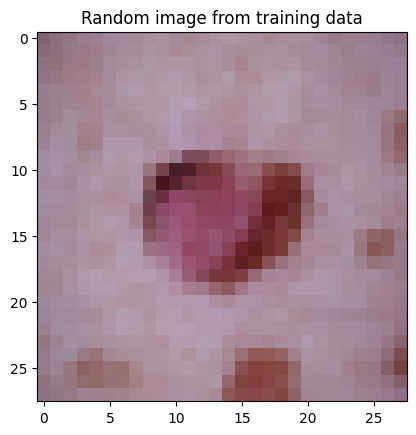

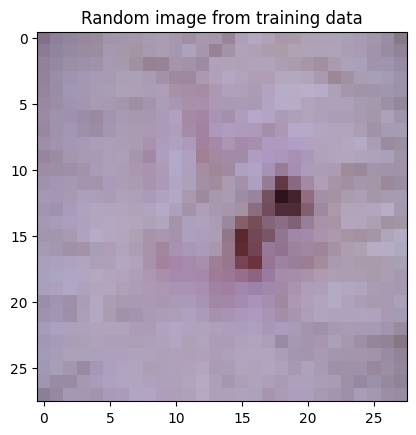

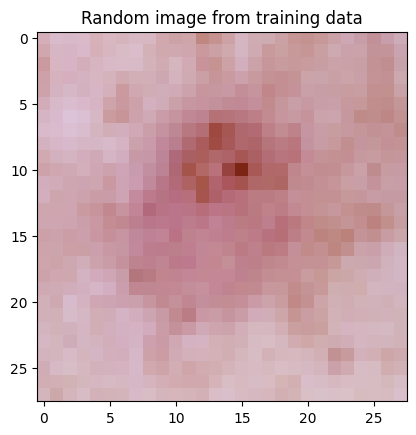

In [17]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [19]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

---



In [20]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [21]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [22]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.2230 - accuracy: 0.5550WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 54ms/step - loss: 1.2230 - accuracy: 0.5550 - val_loss: 3.0495 - val_accuracy: 0.0657
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8623WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 52ms/step - loss: 0.4214 - accuracy: 0.8623 - val_loss: 1.6889 - val_accuracy: 0.3814
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.2682 - accuracy: 0.9111WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.2684 - accuracy: 0.9110 - val_loss: 1.8694 - val_accuracy: 0.3596
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.2077 - accuracy: 0.9302WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 52ms/step - loss: 0.2077 - accuracy: 0.9302 - val_loss: 1.1207 - val_accuracy: 0.4761
Epoch 5/50
234/235 [============================>.] - ETA: 0s - loss: 0.1677 - accuracy: 0.9443WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 52ms/step - loss: 0.1676 - accuracy: 0.9443 - val_loss: 1.1344 - val_accuracy: 0.5189
Epoch 6/50
234/235 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9530WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.1347 - accuracy: 0.9530 - val_loss: 0.9846 - val_accuracy: 0.5854
Epoch 7/50
234/235 [============================>.] - ETA: 0s - loss: 0.1115 - accuracy: 0.9612WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.1116 - accuracy: 0.9612 - val_loss: 0.8785 - val_accuracy: 0.5908
Epoch 8/50
234/235 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9555WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.1229 - accuracy: 0.9555 - val_loss: 0.8051 - val_accuracy: 0.6376
Epoch 9/50
234/235 [============================>.] - ETA: 0s - loss: 0.0916 - accuracy: 0.9674WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0916 - accuracy: 0.9673 - val_loss: 0.6882 - val_accuracy: 0.6813
Epoch 10/50
234/235 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9696WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0884 - accuracy: 0.9696 - val_loss: 0.6242 - val_accuracy: 0.7494
Epoch 11/50
234/235 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9716WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0817 - accuracy: 0.9715 - val_loss: 0.5776 - val_accuracy: 0.7346
Epoch 12/50
234/235 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9760WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0692 - accuracy: 0.9760 - val_loss: 1.8785 - val_accuracy: 0.4867
Epoch 13/50
234/235 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9752WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0736 - accuracy: 0.9752 - val_loss: 0.6448 - val_accuracy: 0.7373
Epoch 14/50
234/235 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9792WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0585 - accuracy: 0.9792 - val_loss: 1.7672 - val_accuracy: 0.5089
Epoch 15/50
234/235 [============================>.] - ETA: 0s - loss: 0.0697 - accuracy: 0.9773WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0697 - accuracy: 0.9772 - val_loss: 0.5943 - val_accuracy: 0.7978
Epoch 16/50
235/235 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9844WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.0471 - accuracy: 0.9844 - val_loss: 0.3529 - val_accuracy: 0.8407
Epoch 17/50
235/235 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9852WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0430 - accuracy: 0.9852 - val_loss: 1.0654 - val_accuracy: 0.6561
Epoch 18/50
234/235 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.9861WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0420 - accuracy: 0.9860 - val_loss: 1.0703 - val_accuracy: 0.7115
Epoch 19/50
235/235 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9859WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 55ms/step - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.4380 - val_accuracy: 0.8624
Epoch 20/50
234/235 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.9873WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.3272 - val_accuracy: 0.8743
Epoch 21/50
235/235 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9865WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0404 - accuracy: 0.9865 - val_loss: 0.2920 - val_accuracy: 0.9054
Epoch 22/50
234/235 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9904WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.2271 - val_accuracy: 0.9152
Epoch 23/50
234/235 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9899WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 1.5611 - val_accuracy: 0.5666
Epoch 24/50
234/235 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9902WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.3467 - val_accuracy: 0.8708
Epoch 25/50
234/235 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9892WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0714 - val_accuracy: 0.9767
Epoch 26/50
234/235 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9910WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0654 - val_accuracy: 0.9783
Epoch 27/50
234/235 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9922WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.1193 - val_accuracy: 0.9536
Epoch 28/50
234/235 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9902WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0658 - val_accuracy: 0.9801
Epoch 29/50
234/235 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.1834 - val_accuracy: 0.9377
Epoch 30/50
234/235 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9930WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 55ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.1172 - val_accuracy: 0.9597
Epoch 31/50
235/235 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9914WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 55ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.1298 - val_accuracy: 0.9507
Epoch 32/50
234/235 [============================>.] - ETA: 0s - loss: 0.0322 - accuracy: 0.9894WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.2901 - val_accuracy: 0.8955
Epoch 33/50
234/235 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.4012 - val_accuracy: 0.8840
Epoch 34/50
234/235 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 12s 53ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.3280 - val_accuracy: 0.8864
Epoch 35/50
234/235 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9940WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.1025 - val_accuracy: 0.9604
Epoch 36/50
234/235 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.1700 - val_accuracy: 0.9463
Epoch 37/50
234/235 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.4001 - val_accuracy: 0.9018
Epoch 38/50
234/235 [============================>.] - ETA: 0s - loss: 0.0111 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0660 - val_accuracy: 0.9744
Epoch 39/50
234/235 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9940WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 53ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 1.2368 - val_accuracy: 0.7313
Epoch 40/50
234/235 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9903WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0905 - val_accuracy: 0.9695
Epoch 41/50
234/235 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9943WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 57ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0301 - val_accuracy: 0.9897
Epoch 42/50
234/235 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 57ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.3025 - val_accuracy: 0.9104
Epoch 43/50
234/235 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0973 - val_accuracy: 0.9697
Epoch 44/50
234/235 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.1198 - val_accuracy: 0.9560
Epoch 45/50
234/235 [============================>.] - ETA: 0s - loss: 0.0091 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.3333 - val_accuracy: 0.9039
Epoch 46/50
234/235 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 1.0997 - val_accuracy: 0.7498
Epoch 47/50
234/235 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 56ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.1915 - val_accuracy: 0.9555
Epoch 48/50
234/235 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9937WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 57ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.1269 - val_accuracy: 0.9539
Epoch 49/50
234/235 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.5357 - val_accuracy: 0.8734
Epoch 50/50
234/235 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0312 - val_accuracy: 0.9836
Duration: 0:10:40.474294


# Step 8: Model Evaluation

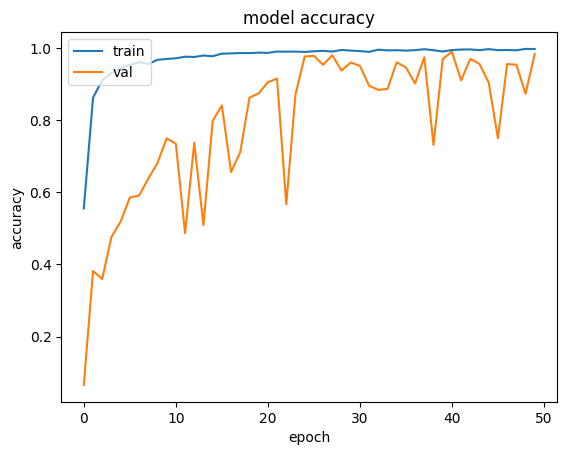

In [23]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

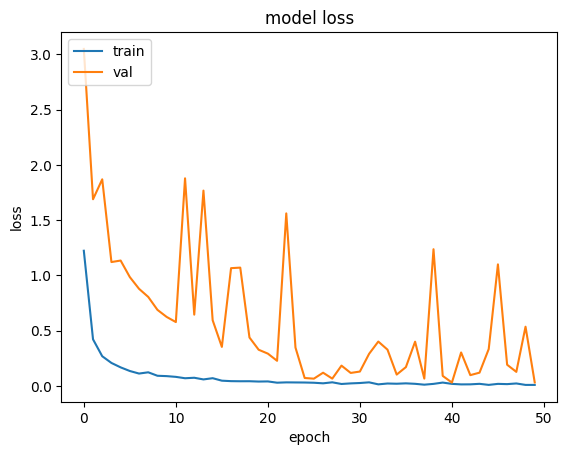

In [24]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [26]:
#model.load_weights('best_model.h5')

In [39]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.5411 - accuracy: 0.7389 - 504ms/epoch - 8ms/step


In [28]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 5ms/step


In [29]:
print(conf_mat)

[[  15   13    6    0    9    0   10]
 [  11   52    6    1   21    0    8]
 [  14   10   79    1   94    0   32]
 [   0    5    2    7   10    0    0]
 [  12   16   19    2 1203    0   95]
 [   0    2    0    0    7    8    8]
 [   7    4   15    0   83    0  116]]


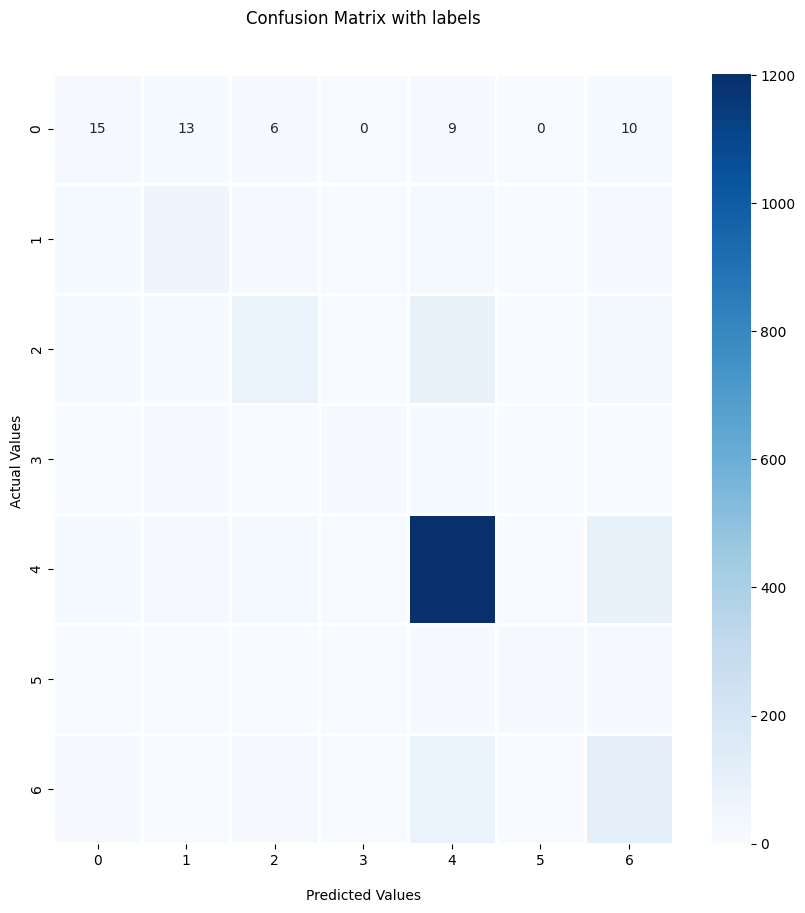

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

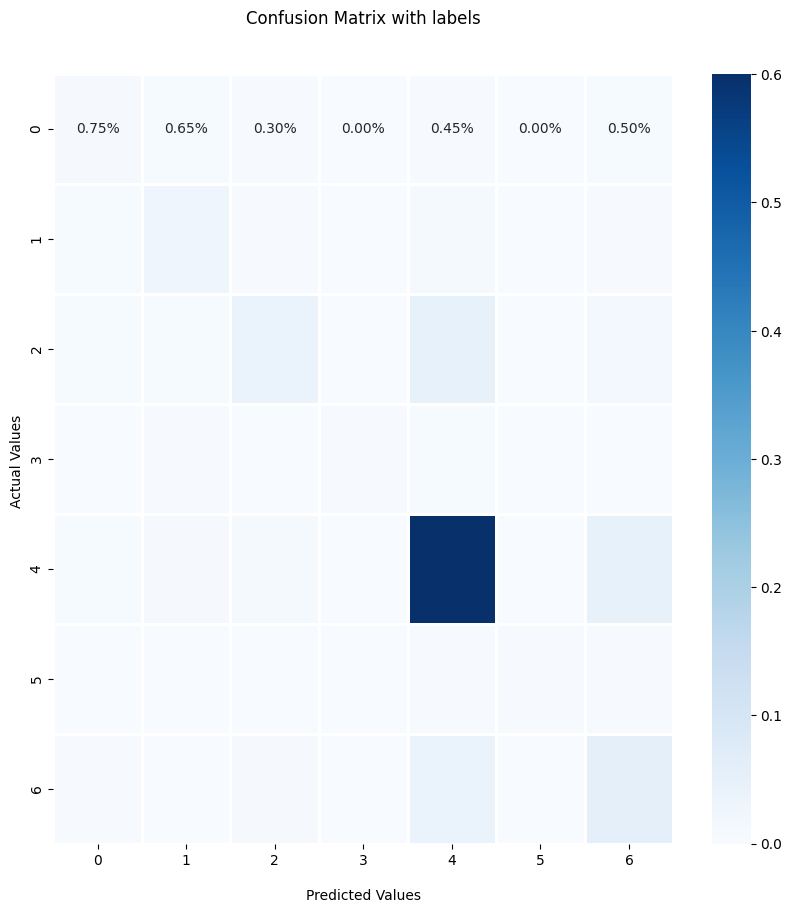

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [35]:
#https://pillow.readthedocs.io/en/stable/

import PIL

image=PIL.Image.open('testcancerimage.jpeg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 140ms/step
[5.6885332e-05 9.8945320e-01 1.9135882e-04 9.6387539e-06 9.9788234e-03
 1.4548721e-04 1.6455859e-04]
('bcc', 'basal cell carcinoma')


1/1 [==============================] - 0s 31ms/step
('bcc', 'basal cell carcinoma')


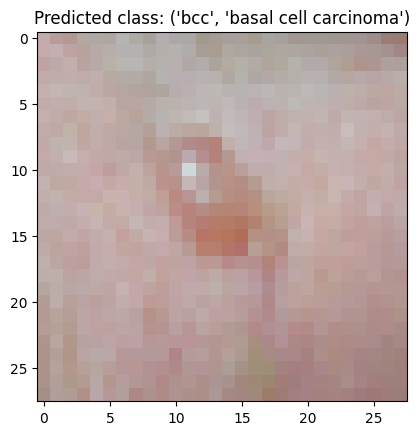

In [36]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image = PIL.Image.open('testcancerimage.jpeg')
image = image.resize((28, 28))
img = np.array(image).reshape(-1, 28, 28, 3)

# Assuming 'model' and 'classes' are defined and available in your environment
# Predict the class of the image
result = model.predict(img)
result = result.tolist()

# Find the class with the highest probability
max_prob = max(result[0])
class_ind = result[0].index(max_prob)

# Print the predicted class
print(classes[class_ind])

# Display the input image
plt.imshow(image)
plt.title(f"Predicted class: {classes[class_ind]}")
plt.show()
